# Работа с сейсмическими данными в формате SEG-Y с использованием библиотеки Segyio

## - Чтение и запись SEG-Y файлов
## - Обработка заголовков и трасс
## - Визуализация сейсмических данных
## - Интеграция с другими библиотеками

In [1]:
import segyio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Чтение Segy

In [74]:
filename = '/Users/ndarkhipov/Desktop/study/lections/python-course/python-in-geophysics-course/F3_Dip_steered_median_subvolume_IL230-430_XL475-675_T1600-1800.sgy'

In [32]:
def parse_trace_headers(segyfile):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df

In [75]:
with segyio.open(filename, ignore_geometry=True) as f:
    print(dir(f))
    headers = parse_trace_headers(f)
    traces = f.trace.raw[:].T

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dtype', '_ext_headers', '_filename', '_fmt', '_gather', '_header', '_il', '_iline', '_iline_length', '_iline_stride', '_ilines', '_mode', '_offsets', '_samples', '_sorting', '_trace', '_tracecount', '_unstructured_errmsg', '_xl', '_xline', '_xline_length', '_xline_stride', '_xlines', 'attributes', 'bin', 'close', 'depth', 'depth_slice', 'dtype', 'endian', 'ext_headers', 'fast', 'flush', 'format', 'gather', 'group', 'header', 'iline', 'ilines', 'interpret', 'mmap', 'offsets', 'readonly', 'samples', 'slow', 'sorting', 'text', 'trace', 'tracecount', 'unstructured', 'xfd', 'xline', 'xlines']


In [34]:
headers

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
0,1,1,230,0,0,475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,230,0,0,476,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,230,0,0,477,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,230,0,0,478,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,230,0,0,479,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40396,197,40397,430,0,0,671,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40397,198,40398,430,0,0,672,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40398,199,40399,430,0,0,673,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40399,200,40400,430,0,0,674,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
headers.CDP.unique()

array([475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,
       488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500,
       501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604,
       605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617,
       618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630,
       631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643,
       644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 65

In [12]:
def parse_headers(f: segyio.SegyFile) -> pd.DataFrame:
    df = pd.DataFrame(f.header)
    # YOUR CODE HERE
    return df

### Визуализация Segway

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

# Количество картинок
N = 100  # Например, 12 изображений

# Определим количество строк и столбцов в гриде
rows = int(np.ceil(np.sqrt(N)))  # Количество строк
cols = int(np.ceil(N / rows))    # Количество столбцов

# Создаем фигуру и оси
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Плоский список осей для удобства
axes: list[Axes] = axes.flatten()

images = []
for cdp in headers.CDP.unique():
    indexes = headers[headers.CDP == cdp].index
    image = traces[:, indexes]
    images.append(image)

# Отображаем изображения
for i in range(N):
    axes[i].imshow(images[i], cmap='viridis')

# Скрываем оси для лишних пустых субплотов, если есть
for i in range(N, len(axes)):
    axes[i].axis('off')

# Показываем результат
plt.tight_layout()
plt.show()

### Оптимизация построения (что будет если файл будет весить 20гб?)

In [50]:
def traces_generator(filename, indexes: list[np.ndarray]):
    with segyio.open(filename, ignore_geometry=True) as f:
        for indexes_stack in indexes:
            traces = []
            for index in indexes_stack:
                traces.append(f.trace.raw[index])
            
            yield np.array(traces).T

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

# Количество картинок
N = 100  # Например, 12 изображений

# Определим количество строк и столбцов в гриде
rows = int(np.ceil(np.sqrt(N)))  # Количество строк
cols = int(np.ceil(N / rows))    # Количество столбцов

# Создаем фигуру и оси
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Плоский список осей для удобства
axes: list[Axes] = axes.flatten()

indexes_stack = []
for cdp in headers.CDP.unique():
    indexes = headers[headers.CDP == cdp].index
    indexes_stack.append(indexes)

# Отображаем изображения
for i, trace in enumerate(traces_generator(filename, indexes_stack)):
    axes[i].imshow(trace, cmap='viridis')

# Скрываем оси для лишних пустых субплотов, если есть
for i in range(N, len(axes)):
    axes[i].axis('off')

# Показываем результат
plt.tight_layout()
plt.show()

## Обработка изображений 

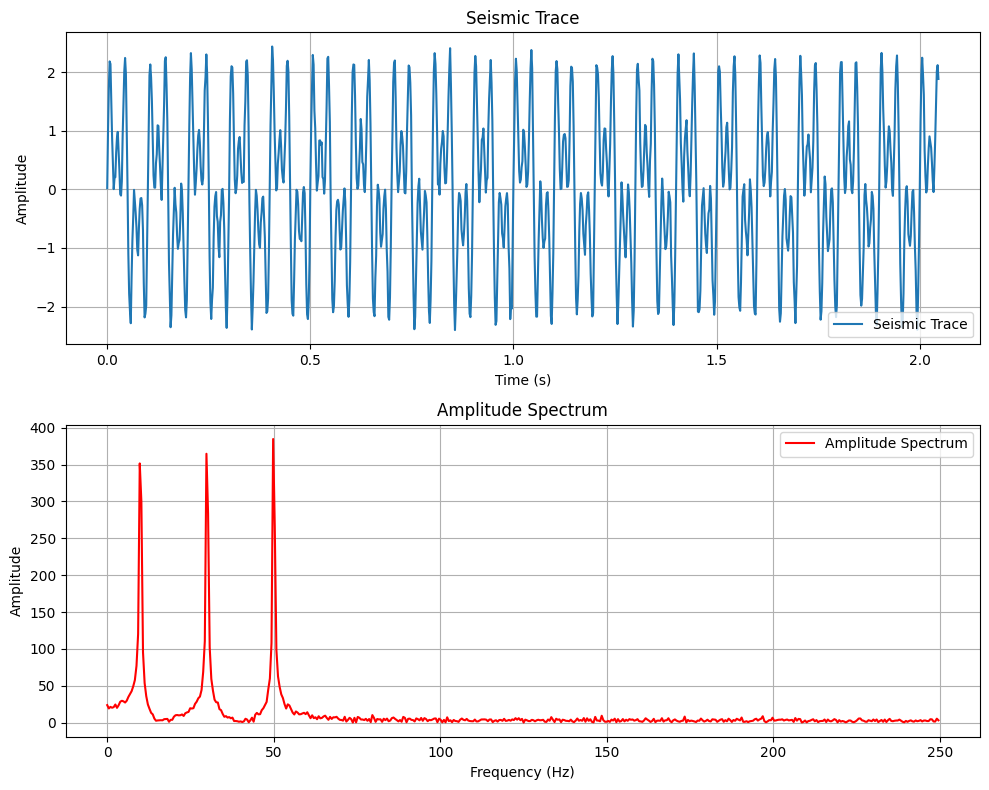

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация синтетической сейсмической трассы
def generate_seismic_trace(length=1024, dt=0.002, frequencies=(10, 30, 50)):
    """
    Генерация сейсмической трассы с заданными частотами.
    :param length: Длина трассы.
    :param dt: Временной шаг (интервал дискретизации).
    :param frequencies: Частоты, присутствующие в сигнале.
    :return: Временной массив и трасса.
    """
    time = np.arange(0, length * dt, dt)
    trace = sum(np.sin(2 * np.pi * freq * time) for freq in frequencies)
    trace += 0.1 * np.random.randn(len(time))  # Добавляем шум
    return time, trace

# Вычисление спектра трассы
def calculate_spectrum(trace, dt):
    """
    Вычисление амплитудного спектра трассы.
    :param trace: Сейсмическая трасса.
    :param dt: Временной шаг.
    :return: Частоты и спектр.
    """
    n = len(trace)
    spectrum = np.fft.fft(trace)
    freq = np.fft.fftfreq(n, d=dt)
    # не забываем про алясинг, обрезаем частоты
    return freq[:n // 2], np.abs(spectrum[:n // 2])  # Возвращаем положительные частоты

# Визуализация трассы и её спектра
def visualize_trace_and_spectrum(time, trace, freq, spectrum):
    """
    Визуализация сейсмической трассы и её спектра.
    :param time: Временной массив.
    :param trace: Сейсмическая трасса.
    :param freq: Частоты.
    :param spectrum: Амплитудный спектр.
    """
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    
    # Временная трасса
    axs[0].plot(time, trace, label="Seismic Trace")
    axs[0].set_title("Seismic Trace")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid()
    axs[0].legend()

    # Амплитудный спектр
    axs[1].plot(freq, spectrum, label="Amplitude Spectrum", color='r')
    axs[1].set_title("Amplitude Spectrum")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Amplitude")
    axs[1].grid()
    axs[1].legend()

    plt.tight_layout()
    plt.show()


# Параметры трассы
length = 1024  # Длина трассы
dt = 0.002     # Временной шаг (2 мс)
frequencies = (10, 30, 50)  # Частоты в сигнале (Гц)

# Генерация трассы
time, trace = generate_seismic_trace(length, dt, frequencies)

# Вычисление спектра
freq, spectrum = calculate_spectrum(trace, dt)

# Визуализация
visualize_trace_and_spectrum(time, trace, freq, spectrum)

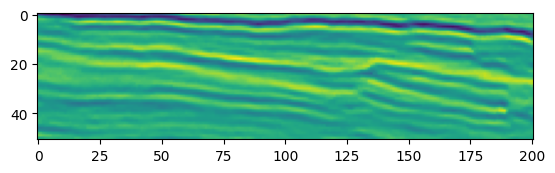

In [61]:
plt.imshow(trace)

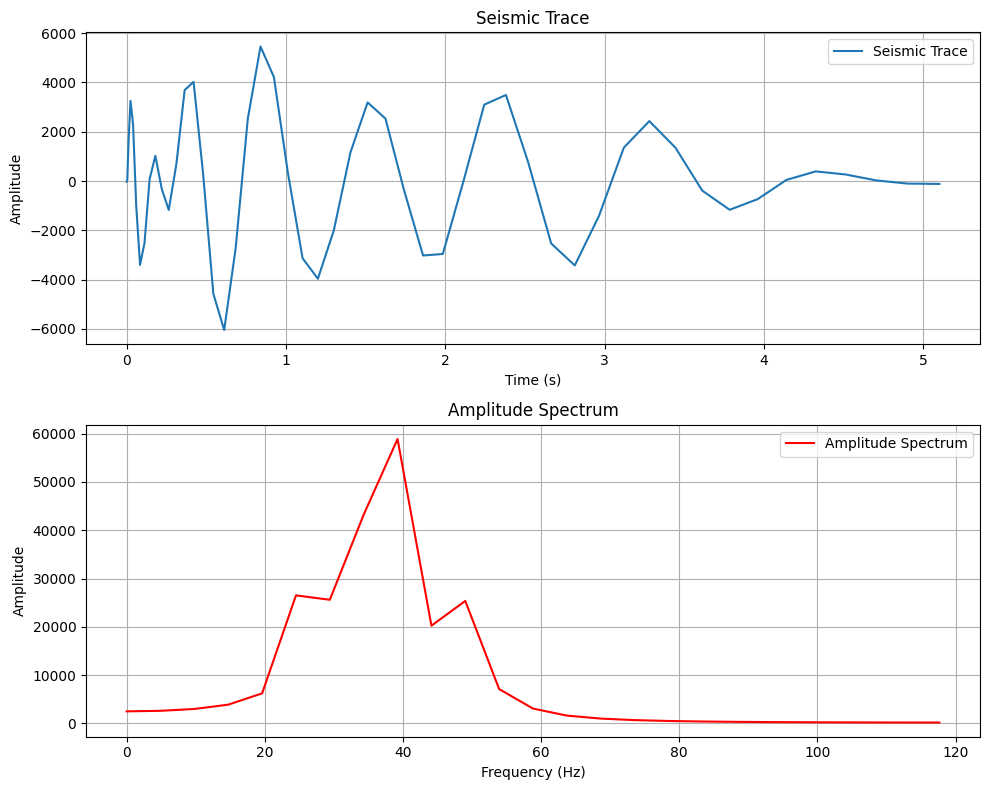

In [81]:
trace = trace[:, 50]
dt = 0.004
time = np.cumsum(np.arange(len(trace)) * dt)

# Вычисление спектра
freq, spectrum = calculate_spectrum(trace, dt)

# Визуализация
visualize_trace_and_spectrum(time, trace, freq, spectrum)

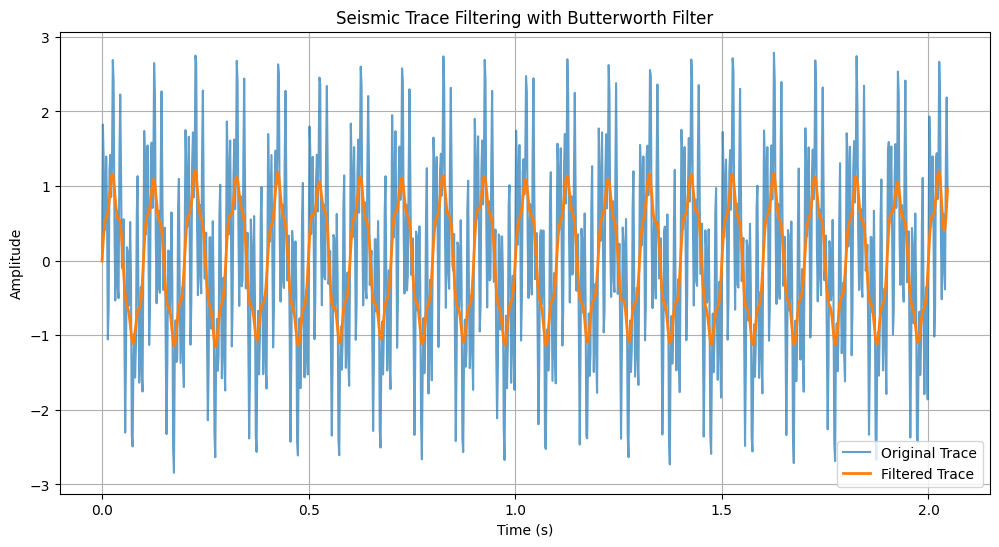

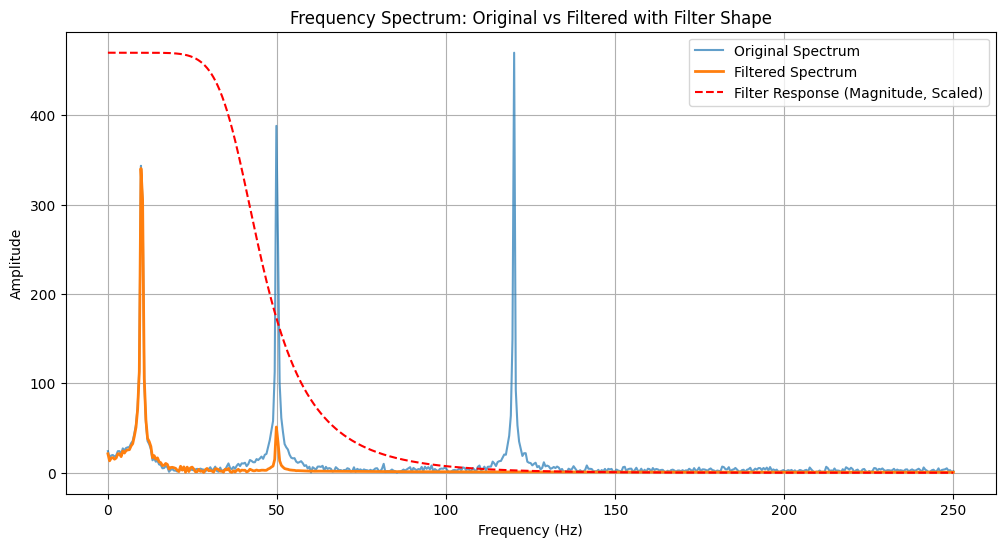

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Генерация синтетической сейсмической трассы
def generate_seismic_trace(length=1024, dt=0.002, frequencies=(10, 50, 120)):
    time = np.arange(0, length * dt, dt)
    trace = sum(np.sin(2 * np.pi * freq * time) for freq in frequencies)
    trace += 0.1 * np.random.randn(len(time))  # Добавляем шум
    return time, trace

# Применение фильтра Баттерворта
def butterworth_filter(trace, dt, cutoff, order=4, filter_type="low"):
    nyquist = 0.5 / dt  # Частота Найквиста
    normalized_cutoff = np.array(cutoff) / nyquist
    b, a = butter(order, normalized_cutoff, btype=filter_type)
    filtered_trace = filtfilt(b, a, trace)
    return b, a, filtered_trace

# Визуализация трассы
def visualize_traces(time, original_trace, filtered_trace):
    plt.figure(figsize=(12, 6))
    plt.plot(time, original_trace, label="Original Trace", alpha=0.7)
    plt.plot(time, filtered_trace, label="Filtered Trace", linewidth=2)
    plt.title("Seismic Trace Filtering with Butterworth Filter")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

# Визуализация спектров и формы фильтра
def visualize_spectra_with_filter(trace, filtered_trace, b, a, dt):
    freq = np.fft.rfftfreq(len(trace), d=dt)  # Частотная шкала
    spectrum_original = np.abs(np.fft.rfft(trace))
    spectrum_filtered = np.abs(np.fft.rfft(filtered_trace))

    # Расчет АЧХ фильтра
    w, h = freqz(b, a, worN=8000)
    w_hz = w * (0.5 / np.pi) / dt  # Преобразуем частоты в Гц

    # Масштабирование фильтра для соответствия спектру
    h_scaled = np.abs(h) * (np.max(spectrum_original) / np.max(np.abs(h)))

    plt.figure(figsize=(12, 6))
    plt.plot(freq, spectrum_original, label="Original Spectrum", alpha=0.7)
    plt.plot(freq, spectrum_filtered, label="Filtered Spectrum", linewidth=2)
    plt.plot(w_hz, h_scaled, label="Filter Response (Magnitude, Scaled)", linestyle="--", color="red")
    plt.title("Frequency Spectrum: Original vs Filtered with Filter Shape")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()


# Параметры трассы
length = 1024  # Длина трассы
dt = 0.002     # Временной шаг (2 мс)
frequencies = (10, 50, 120)  # Частоты в сигнале (Гц)

# Параметры фильтра
cutoff_frequency = 40  # Граничная частота для низкочастотного фильтра
filter_order = 4       # Порядок фильтра

# Генерация трассы
time, trace = generate_seismic_trace(length, dt, frequencies)

# Применение фильтрации
b, a, filtered_trace = butterworth_filter(trace, dt, cutoff_frequency, filter_order, filter_type="low")

# Визуализация
visualize_traces(time, trace, filtered_trace)
visualize_spectra_with_filter(trace, filtered_trace, b, a, dt)


### Сохранение данных при помощи segyio

In [73]:
import segyio
import numpy as np
from scipy.signal import butter, filtfilt

# Используемая функция фильтрации (перед фильтрацией)
def butterworth_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# 1. Чтение сейсмотрасс из SEG-Y
input_filename = filename
output_filename = "output.sgy"

with segyio.open(input_filename, "r", strict=False) as segyfile:
    segyfile.mmap()  # Открываем файл в режиме mmap для эффективного доступа
    
    # Получение данных трасс
    traces = segyio.tools.collect(segyfile.trace[:])
    sample_rate = segyio.tools.dt(segyfile) / 1e6  # Интервал выборки в секундах
    fs = 1 / sample_rate  # Частота дискретизации

# 2. Фильтрация сейсмотрасс
lowcut = 25  # Нижняя граница частотного диапазона (Гц)
highcut = 50  # Верхняя граница частотного диапазона (Гц)
filtered_traces = np.array([butterworth_filter(trace, lowcut, highcut, fs) for trace in traces])

# 3. Сохранение данных в новый SEG-Y
with segyio.open(input_filename, "r", strict=False) as segyfile:
    spec = segyio.spec()
    spec.samples = segyfile.samples
    spec.ilines = segyfile.ilines
    spec.xlines = segyfile.xlines
    #spec.sorting = segyio.TraceSortingFormat.
    spec.format = segyfile.format
    spec.tracecount = segyfile.tracecount

    # Создаем новый SEG-Y файл
    with segyio.create(output_filename, spec) as output_segy:
        output_segy.text[0] = segyio.tools.wrap(segyfile.text[0])
        output_segy.bin = segyfile.bin
        output_segy.header = segyfile.header
        output_segy.trace = filtered_traces

print(f"Фильтрованные данные сохранены в файл {output_filename}")


/Users/ndarkhipov/Desktop/study/lections/python-course/python-in-geophysics-course/.venv/lib/python3.11/site-packages/segyio/utils.py:23: RuntimeWarning: Implicit conversion from float64 to float32 (narrowing)
  warnings.warn(msg.format(x.dtype, dtype), RuntimeWarning)


Фильтрованные данные сохранены в файл output.segy


### Генерация синтетических сейсмограмм

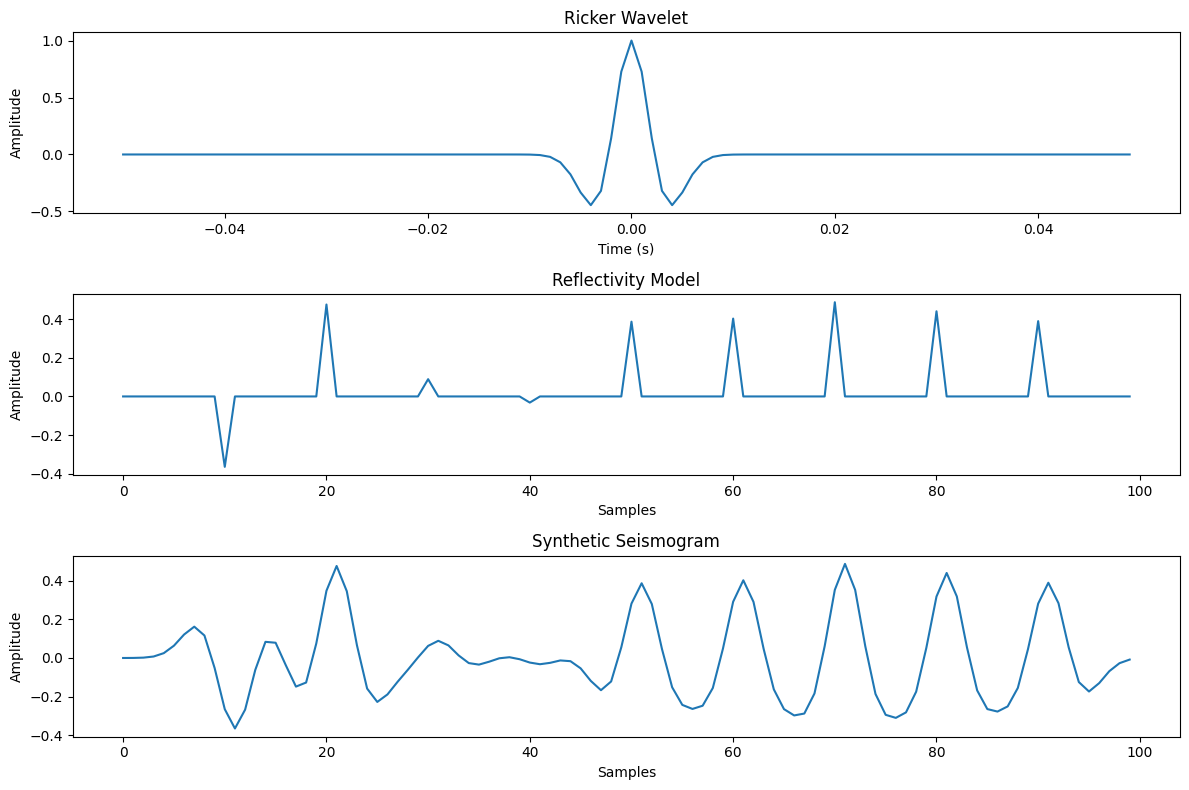

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 1. Создаем импульс (Ricker wavelet)
def ricker_wavelet(frequency, dt, duration):
    """
    Генерирует Ricker wavelet (импульс) с заданной частотой, временным шагом и длительностью.
    """
    t = np.arange(-duration / 2, duration / 2, dt)
    wavelet = (1 - 2 * (np.pi**2) * (frequency**2) * (t**2)) * np.exp(-(np.pi**2) * (frequency**2) * (t**2))
    return t, wavelet

# 2. Создаем импульсную модель среды
def generate_reflectivity(num_layers, layer_thickness, reflectivity_range=(-0.5, 0.5)):
    """
    Генерирует модель коэффициентов отражения для слоистой среды.
    """
    reflectivity = np.random.uniform(reflectivity_range[0], reflectivity_range[1], num_layers - 1)
    impedance = np.cumsum(np.ones(num_layers))  # Простая модель импедансов
    model = np.zeros(num_layers * layer_thickness)
    
    for i in range(1, num_layers):
        model[i * layer_thickness] = reflectivity[i - 1]
    
    return model

# 3. Свертка импульса с моделью отражений
def generate_seismogram(reflectivity_model, wavelet):
    """
    Генерирует сейсмограмму с помощью свертки импульса и модели отражений.
    """
    return convolve(reflectivity_model, wavelet, mode='same')

# Параметры
frequency = 100  # Частота импульса (Гц)
dt = 0.001  # Шаг по времени (с)
duration = 0.1  # Длительность импульса (с)
num_layers = 10  # Количество слоев
layer_thickness = 10  # Толщина слоя в отсчетах

# Генерация данных
t_wavelet, wavelet = ricker_wavelet(frequency, dt, duration)
reflectivity_model = generate_reflectivity(num_layers, layer_thickness)
seismogram = generate_seismogram(reflectivity_model, wavelet)

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t_wavelet, wavelet)
plt.title("Ricker Wavelet")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(reflectivity_model)
plt.title("Reflectivity Model")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(seismogram)
plt.title("Synthetic Seismogram")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

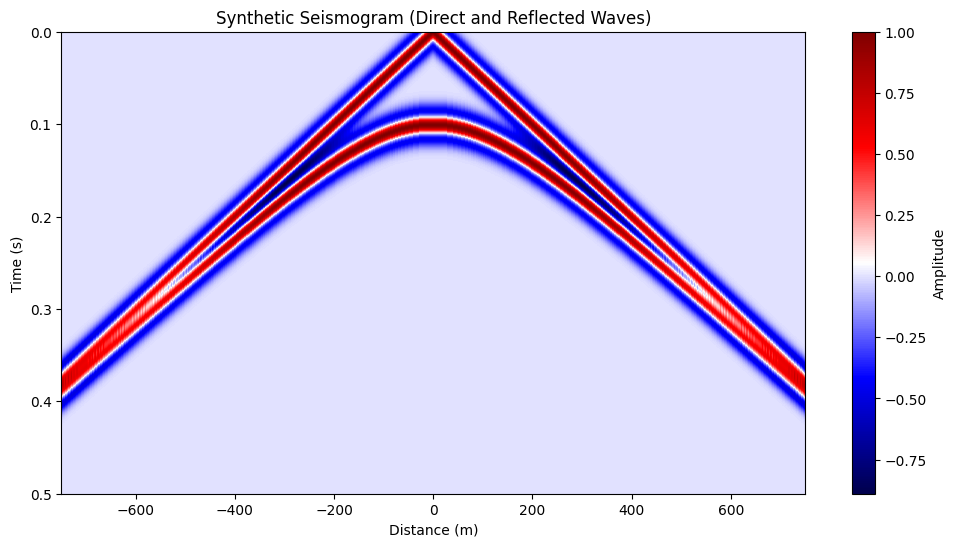

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Функция для генерации импульса Риккера
def ricker_wavelet(frequency, dt, duration):
    t = np.arange(-duration / 2, duration / 2, dt)
    wavelet = (1 - 2 * (np.pi**2) * (frequency**2) * (t**2)) * np.exp(-(np.pi**2) * (frequency**2) * (t**2))
    return t, wavelet

# Параметры среды и импульса
v = 2000  # Скорость волны (м/с)
h = 100  # Глубина второго слоя (м)
x = np.linspace(-750, 750, 1000)  # Расстановка приемников

frequency = 25  # Частота импульса (Гц)
dt = 0.001  # Шаг времени (с)
duration = 0.1  # Длительность импульса (с)

# Времена прихода прямой и отраженной волн
t_ref = 1 / v * np.sqrt(x**2 + 4 * h**2)
t_dir = 1 / v * np.abs(x)

# Генерация импульса Риккера
_, wavelet = ricker_wavelet(frequency, dt, duration)

# Функция для свертки сейсмотрассы
def convolve_waveform(time_array, wavelet, dt, num_samples):
    traces = []
    for t in time_array:
        trace = np.zeros(num_samples)
        idx = int(t / dt)
        if idx < num_samples:
            trace[idx] = 1
        traces.append(trace)
    return np.array(traces)

# Генерация трасс
num_samples = 500
direct_wave = convolve_waveform(t_dir, wavelet, dt, num_samples)
reflected_wave = convolve_waveform(t_ref, wavelet, dt, num_samples)

# Сумма волн для итоговой сейсмограммы
seismogram = direct_wave + reflected_wave

for i, trace in enumerate(seismogram):
    seismogram[i] = convolve(seismogram[i], wavelet, mode='same')


# Визуализация сейсмограммы
plt.figure(figsize=(12, 6))
plt.imshow(seismogram.T, extent=[x.min(), x.max(), num_samples * dt, 0], aspect='auto', cmap='seismic')
plt.colorbar(label="Amplitude")
plt.title("Synthetic Seismogram (Direct and Reflected Waves)")
plt.xlabel("Distance (m)")
plt.ylabel("Time (s)")
plt.show()
